In [ ]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
archivo_gz='df.csv.gz'

In [4]:
import gzip
import shutil

archivo_descomprimido = 'df.csv'

with gzip.open(archivo_gz, 'rb') as f_in:
    with open(archivo_descomprimido, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print(f"Archivo descomprimido guardado en: {archivo_descomprimido}")

Archivo descomprimido guardado en: df.csv


In [5]:
dataset="df.csv"

In [6]:
df = pd.read_csv(dataset, encoding="latin-1")

In [7]:
df.columns

Index(['Unnamed: 0', 'UserID', 'MovieID', 'Rating', 'Timestamp', 'Title',
       'Gender_x', 'names', 'date_x', 'score', 'genre_imdb', 'overview',
       'crew', 'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue',
       'country', 'Gender_y', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [8]:
df

,Unnamed: 0,UserID,MovieID,Rating,Timestamp,Title,Gender_x,names,date_x,score,...,orig_title,status,orig_lang,budget_x,revenue,country,Gender_y,Age,Occupation,Zip-code
0,0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,04/01/1976,84.0,...,One Flew Over the Cuckoo's Nest,Released,English,4400000.0,163274115.0,AU,F,1,10,48067
1,1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,04/03/1997,65.0,...,James and the Giant Peach,Released,English,38000000.0,28946127.0,AU,F,1,10,48067
2,2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,10/21/1964,75.0,...,My Fair Lady,Released,English,17000000.0,72072607.0,US,F,1,10,48067
3,3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,04/13/2000,74.0,...,Erin Brockovich,Released,English,50000000.0,257805243.0,AU,F,1,10,48067
4,4,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs,06/02/1938,71.0,...,Snow White and the Seven Dwarfs,Released,English,1488000.0,184925486.0,AU,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478211,478211,6040,1090,3,956715518,Platoon (1986),Drama|War,Platoon,03/05/1987,77.0,...,Platoon,Released,English,6000000.0,137978395.0,AU,M,25,6,11106
478212,478212,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,Weekend at Bernie's,03/15/1990,64.0,...,Weekend at Bernie's,Released,English,6500000.0,30218387.0,AU,M,25,6,11106
478213,478213,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,Welcome to the Dollhouse,05/24/1996,72.0,...,Welcome to the Dollhouse,Released,English,800000.0,5034794.0,US,M,25,6,11106
478214,478214,6040,1096,4,956715648,Sophie's Choice (1982),Drama,Sophie's Choice,12/08/1982,74.0,...,Sophie's Choice,Released,English,12000000.0,30036000.0,US,M,25,6,11106


In [9]:
print(df[df['MovieID'] == 1193])

        Unnamed: 0  UserID  MovieID  Rating  Timestamp  \
0                0       1     1193       5  978300760   
63              63       2     1193       5  978298413   
659            659      12     1193       4  978220179   
750            750      15     1193       4  978199279   
869            869      17     1193       5  978158471   
...            ...     ...      ...     ...        ...   
477410      477410    6033     1193       5  956713500   
477473      477473    6035     1193       5  956710879   
477653      477653    6036     1193       5  956710766   
477944      477944    6037     1193       4  956709215   
478102      478102    6040     1193       4  957716612   

                                         Title Gender_x  \
0       One Flew Over the Cuckoo's Nest (1975)    Drama   
63      One Flew Over the Cuckoo's Nest (1975)    Drama   
659     One Flew Over the Cuckoo's Nest (1975)    Drama   
750     One Flew Over the Cuckoo's Nest (1975)    Drama   
869     

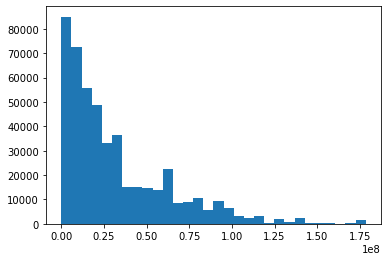

In [10]:
plt.hist(df['budget_x'],bins=30)
plt.show()

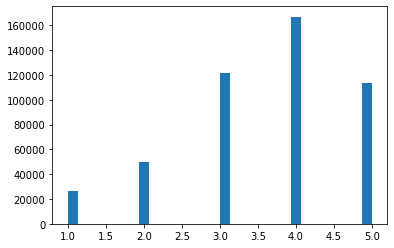

In [11]:
plt.hist(df['Rating'],bins=30)
plt.show()

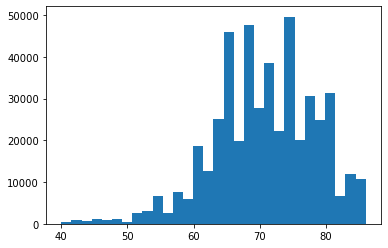

In [13]:
plt.hist(df['score'],bins=30)
plt.show()

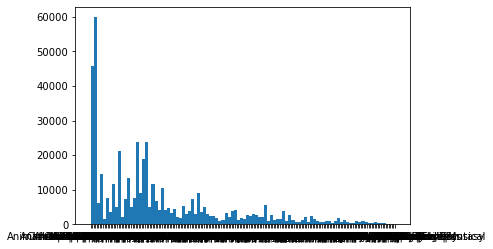

In [14]:
plt.hist(df['Gender_x'],bins=100)
plt.show()

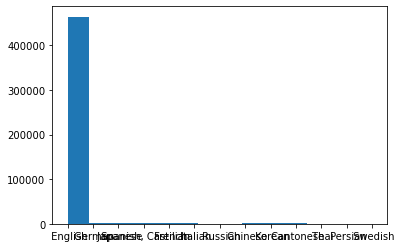

In [15]:
plt.hist(df['orig_lang'],bins=14)
plt.show()

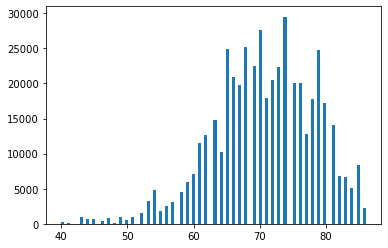

In [17]:
plt.hist(df['score'],bins=100)
plt.show()

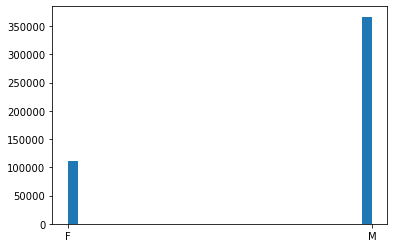

In [18]:
plt.hist(df['Gender_y'],bins=30)
plt.show()

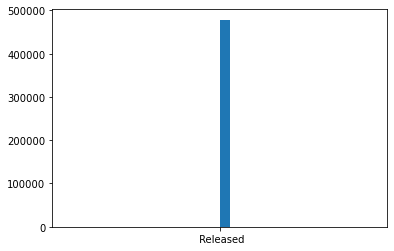

In [19]:
plt.hist(df['status'],bins=30)
plt.show()

In [20]:
df

,Unnamed: 0,UserID,MovieID,Rating,Timestamp,Title,Gender_x,names,date_x,score,...,orig_title,status,orig_lang,budget_x,revenue,country,Gender_y,Age,Occupation,Zip-code
0,0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,04/01/1976,84.0,...,One Flew Over the Cuckoo's Nest,Released,English,4400000.0,163274115.0,AU,F,1,10,48067
1,1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,04/03/1997,65.0,...,James and the Giant Peach,Released,English,38000000.0,28946127.0,AU,F,1,10,48067
2,2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,10/21/1964,75.0,...,My Fair Lady,Released,English,17000000.0,72072607.0,US,F,1,10,48067
3,3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,04/13/2000,74.0,...,Erin Brockovich,Released,English,50000000.0,257805243.0,AU,F,1,10,48067
4,4,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs,06/02/1938,71.0,...,Snow White and the Seven Dwarfs,Released,English,1488000.0,184925486.0,AU,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478211,478211,6040,1090,3,956715518,Platoon (1986),Drama|War,Platoon,03/05/1987,77.0,...,Platoon,Released,English,6000000.0,137978395.0,AU,M,25,6,11106
478212,478212,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,Weekend at Bernie's,03/15/1990,64.0,...,Weekend at Bernie's,Released,English,6500000.0,30218387.0,AU,M,25,6,11106
478213,478213,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,Welcome to the Dollhouse,05/24/1996,72.0,...,Welcome to the Dollhouse,Released,English,800000.0,5034794.0,US,M,25,6,11106
478214,478214,6040,1096,4,956715648,Sophie's Choice (1982),Drama,Sophie's Choice,12/08/1982,74.0,...,Sophie's Choice,Released,English,12000000.0,30036000.0,US,M,25,6,11106


## Percent gain

In [21]:
df["percentual_gain"] = (df["revenue"] / df["budget_x"]) * 100

In [22]:
df_percentgain = df

In [23]:
df_percentgain = df_percentgain.drop(columns=["Age","UserID","Occupation"])


In [24]:
df_percentgain = df_percentgain.drop_duplicates(subset=['MovieID'])

In [25]:
type(df_percentgain["date_x"][0])

str

In [26]:
df_percentgain = df_percentgain.drop(columns=["overview","crew"])

In [27]:
df_percentgain['date_x'] = df_percentgain['date_x'].str.strip()

df_percentgain['date_x'] = pd.to_datetime(df_percentgain['date_x'], format='%d/%m/%Y', errors='coerce')

print(df_percentgain[df_percentgain['date_x'].isna()])


        Unnamed: 0  MovieID  Rating   Timestamp  \
2                2      914       3   978301968   
3                3     3408       4   978300275   
5                5     2918       4   978302124   
7                7     2018       4   978301777   
8                8     3105       5   978301713   
...            ...      ...     ...         ...   
116833      116833     3216       1   974838817   
116868      116868     3621       1   974836467   
130578      130578     2299       4  1041975671   
145933      145933     2226       3  1036451763   
264147      264147     1430       1   970074286   

                                        Title              Gender_x  \
2                         My Fair Lady (1964)       Musical|Romance   
3                      Erin Brockovich (2000)                 Drama   
5             Ferris Bueller's Day Off (1986)                Comedy   
7                                Bambi (1942)  Animation|Children's   
8                           Awak

In [28]:
df_percentgain['date_x'] = pd.to_datetime(df_percentgain['date_x'], format='%d/%m/%Y')
df_percentgain['year'] = df_percentgain['date_x'].dt.year

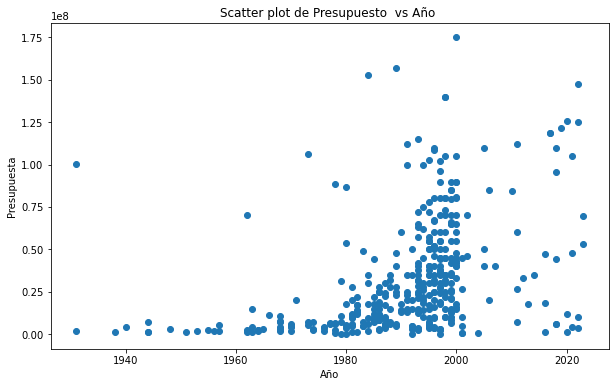

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df_percentgain['year'], df_percentgain['budget_x'])
plt.xlabel('Año')
plt.ylabel('Presupuesta')
plt.title('Scatter plot de Presupuesto  vs Año ')
plt.show()


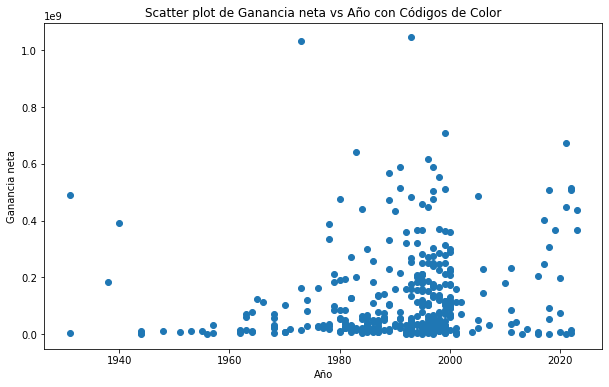

In [30]:

plt.figure(figsize=(10,6))
plt.scatter(df_percentgain['year'], df_percentgain['revenue'])
plt.xlabel('Año')
plt.ylabel('Ganancia neta')
plt.title('Scatter plot de Ganancia neta vs Año con Códigos de Color')
plt.show()


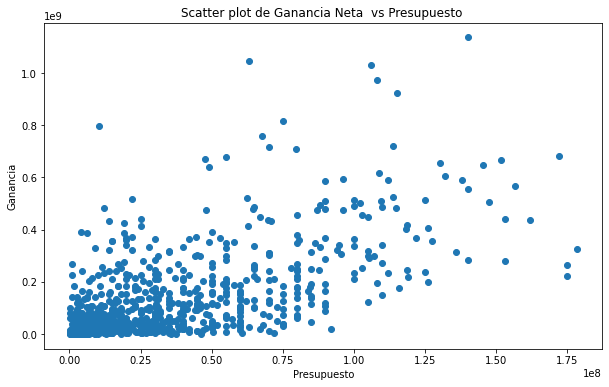

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(df_percentgain['budget_x'], df_percentgain['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Ganancia')
plt.title('Scatter plot de Ganancia Neta  vs Presupuesto ')
plt.show()


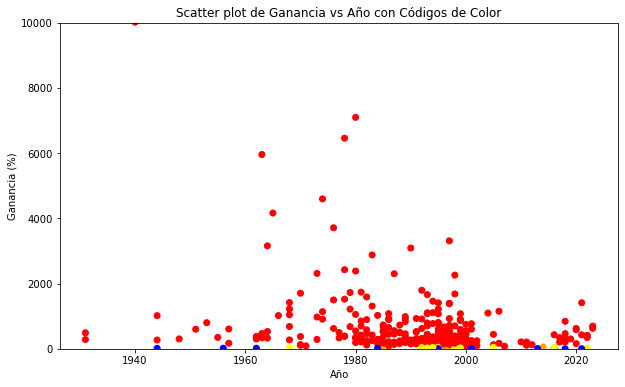

In [ ]:


df_percentgain['date_x'] = pd.to_datetime(df_percentgain['date_x'], format='%d/%m/%Y')
df_percentgain['year'] = df_percentgain['date_x'].dt.year

def asignar_color(ganancia):
    if ganancia > 75:
        return 'red'
    elif 50 < ganancia <= 75:
        return 'orange'
    elif 25 < ganancia <= 50:
        return 'yellow'
    else:
        return 'blue'

df_percentgain['color'] = df_percentgain['percentual_gain'].apply(asignar_color)

plt.figure(figsize=(10,6))
plt.scatter(df_percentgain['year'], df_percentgain['percentual_gain'], c=df_percentgain['color'])
plt.ylim(0, 10000)
plt.xlabel('Año')
plt.ylabel('Ganancia (%)')
plt.title('Scatter plot de Ganancia vs Año con Códigos de Color')
plt.show()


In [34]:
df_percentgain

,Unnamed: 0,MovieID,Rating,Timestamp,Title,Gender_x,names,date_x,score,genre_imdb,...,status,orig_lang,budget_x,revenue,country,Gender_y,Zip-code,percentual_gain,year,color
0,0,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,1976-01-04,84.0,Drama,...,Released,English,4400000.0,163274115.0,AU,F,48067,3710.775341,1976.0,red
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,1997-03-04,65.0,"Adventure,Â Animation,Â Family,Â Fantasy",...,Released,English,38000000.0,28946127.0,AU,F,48067,76.174018,1997.0,red
2,2,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,NaT,75.0,"Romance,Â Drama,Â Music",...,Released,English,17000000.0,72072607.0,US,F,48067,423.956512,NaN,red
3,3,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,NaT,74.0,Drama,...,Released,English,50000000.0,257805243.0,AU,F,48067,515.610486,NaN,red
4,4,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs,1938-02-06,71.0,"Fantasy,Â Animation,Â Family",...,Released,English,1488000.0,184925486.0,AU,F,48067,12427.788038,1938.0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138874,138874,3652,2,1041753491,City of the Living Dead (Paura nella cittÃ de...,Horror,City of the Living Dead,1980-11-08,63.0,Horror,...,Released,Italian,87000000.0,476680473.8,IT,M,43725,547.908591,1980.0,red
145933,145933,2226,3,1036451763,"Ring, The (1927)",Drama,Ring,NaT,71.0,"Horror,Â Thriller",...,Released,Japanese,1200000.0,19400000.0,AU,F,48103,1616.666667,NaN,red
226986,226986,2777,4,972180772,Cobra (1925),Drama,Cobra,1986-01-10,60.0,"Action,Â Crime,Â Thriller",...,Released,English,25000000.0,49042224.0,AU,F,12345,196.168896,1986.0,red
264147,264147,1430,1,970074286,Underworld (1997),Thriller,Underworld,NaT,68.0,"Fantasy,Â Action,Â Thriller",...,Released,English,22000000.0,95708457.0,AU,M,48135,435.038441,NaN,red


## Genres

In [35]:
genre_mapping = {genre: idx for idx, genre in enumerate(df_percentgain['Gender_x'].unique())}
df_percentgain['genre_num'] = df_percentgain['Gender_x'].map(genre_mapping)

orig_lang_mapping = {lang: idx for idx, lang in enumerate(df_percentgain['orig_lang'].unique())}
df_percentgain['orig_lang_num'] = df_percentgain['orig_lang'].map(orig_lang_mapping)

print("Mapeo de 'genre':")
for genre, num in genre_mapping.items():
    print(f"{genre}: {num}")

print("\nMapeo de 'orig_lang':")
for lang, num in orig_lang_mapping.items():
    print(f"{lang}: {num}")

print("\nDataFrame resultante:")
print(df_percentgain[['percentual_gain', 'genre_num', 'orig_lang_num']])


Mapeo de 'genre':
Drama: 0
Animation|Children's|Musical: 1
Musical|Romance: 2
Comedy: 3
Animation|Children's: 4
Comedy|Fantasy: 5
Comedy|Sci-Fi: 6
Drama|War: 7
Romance: 8
Animation|Children's|Musical|Romance: 9
Children's|Drama|Fantasy|Sci-Fi: 10
Animation|Children's|Comedy: 11
Action|Crime|Romance: 12
Children's|Comedy|Musical: 13
Action|Drama|War: 14
Crime|Drama|Thriller: 15
Action|Adventure|Mystery: 16
Action|Adventure|Fantasy|Sci-Fi: 17
Crime|Drama: 18
Action|Thriller: 19
Comedy|Drama|Western: 20
Action|Adventure|Crime: 21
Action|Crime|Mystery|Thriller: 22
Action|Drama: 23
Action|Drama|Thriller: 24
Drama|Romance: 25
Action|Comedy|Western: 26
Adventure|Comedy|Drama: 27
Action|Crime|Thriller: 28
Drama|Sci-Fi: 29
Action|Sci-Fi|Thriller: 30
Comedy|Drama: 31
Action|Sci-Fi: 32
Adventure|Drama|Romance|Sci-Fi: 33
Action|Adventure|Sci-Fi: 34
Drama|Romance|War: 35
Comedy|Romance: 36
Adventure|Drama|Western: 37
Action|Adventure|Thriller: 38
Action|Adventure|Romance|Thriller: 39
Action|Adventu

In [36]:
df['genre_split'] = df['Gender_x'].str.split('|')
df_exploded = df.explode('genre_split')

genres_encoded = df['genre_split'].str.join('|').str.get_dummies()
df = pd.concat([df, genres_encoded], axis=1)

print(df.head())

   Unnamed: 0  UserID  MovieID  Rating  Timestamp  \
0           0       1     1193       5  978300760   
1           1       1      661       3  978302109   
2           2       1      914       3  978301968   
3           3       1     3408       4  978300275   
4           4       1      594       4  978302268   

                                    Title                      Gender_x  \
0  One Flew Over the Cuckoo's Nest (1975)                         Drama   
1        James and the Giant Peach (1996)  Animation|Children's|Musical   
2                     My Fair Lady (1964)               Musical|Romance   
3                  Erin Brockovich (2000)                         Drama   
4  Snow White and the Seven Dwarfs (1937)  Animation|Children's|Musical   

                             names       date_x  score  ... Fantasy Film-Noir  \
0  One Flew Over the Cuckoo's Nest  04/01/1976    84.0  ...       0         0   
1        James and the Giant Peach  04/03/1997    65.0  ...       0 

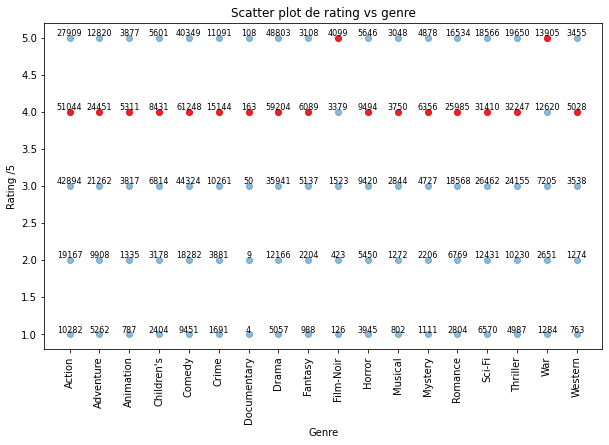

In [37]:
counts = df_exploded.groupby(['genre_split', 'Rating']).size().reset_index(name='counts')

max_counts = counts.loc[counts.groupby('genre_split')['counts'].idxmax()]


plt.figure(figsize=(10,6))
plt.scatter(counts['genre_split'], counts['Rating'], alpha=0.5, label='Autres points')
plt.scatter(max_counts['genre_split'], max_counts['Rating'], color='red', alpha=0.8, label='Point max par pays')
for i in range(len(counts)):
    plt.text(counts['genre_split'][i], counts['Rating'][i], str(counts['counts'][i]),
             fontsize=8, ha='center', va='bottom')


plt.xlabel('Genre')
plt.ylabel('Rating /5')
plt.title('Scatter plot de rating vs genre')
plt.xticks(rotation=90) 
plt.show()

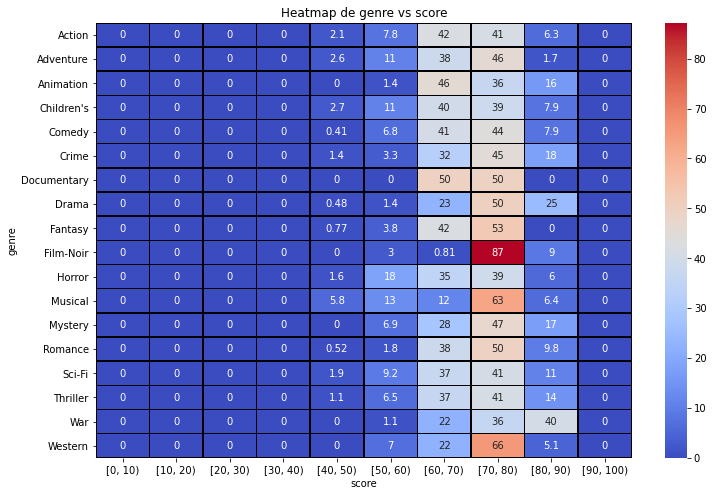

In [38]:
df_exploded['score_range'] = pd.cut(df_exploded['score'], bins=np.arange(0, 101, 10), right=False)


pivot_table = df_exploded.pivot_table(index='genre_split', columns='score_range', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_percentage, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Heatmap de genre vs score')
plt.xlabel('score')
plt.ylabel('genre')
plt.show()


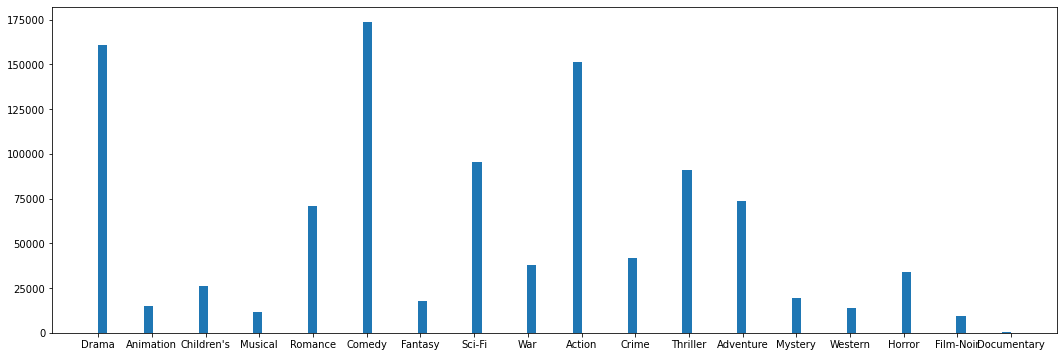

In [39]:
plt.figure(figsize=(18,6))
plt.hist(df_exploded['genre_split'],bins=100)
plt.show()

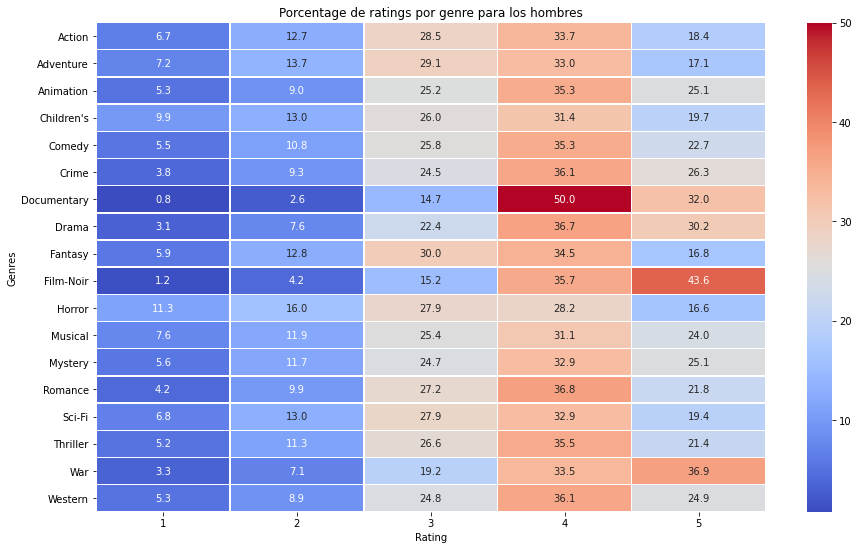

In [40]:
df_men = df_exploded[df_exploded['Gender_y'] == 'M']
grouped_men = df_men.groupby(['genre_split', 'Rating']).size().unstack(fill_value=0)

total_men_per_genre = df_men.groupby('genre_split').size()

percentage_men_per_genre_rating = (grouped_men.T / total_men_per_genre).T * 100

plt.figure(figsize=(15, 9))
sns.heatmap(percentage_men_per_genre_rating, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Porcentage de ratings por genre para los hombres')
plt.xlabel('Rating')
plt.ylabel('Genres')

plt.show()

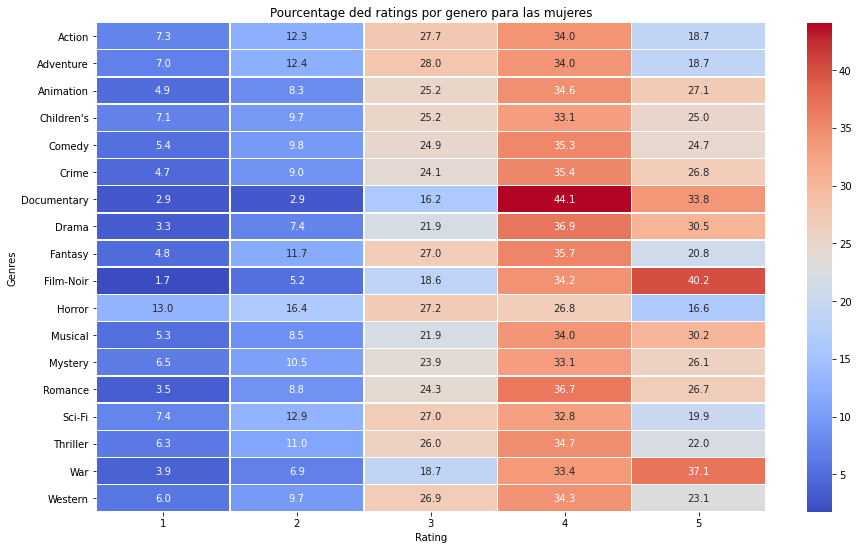

In [41]:
#Lo mismo para mujeres
df_women = df_exploded[df_exploded['Gender_y'] == 'F']
grouped_women = df_women.groupby(['genre_split', 'Rating']).size().unstack(fill_value=0)
total_women_per_genre = df_women.groupby('genre_split').size()
percentage_women_per_genre_rating = (grouped_women.T / total_women_per_genre).T * 100

plt.figure(figsize=(15, 9))
sns.heatmap(percentage_women_per_genre_rating, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Pourcentage ded ratings por genero para las mujeres')
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.show()

In [42]:
def asignar_color(ganancia):
        if ganancia > 75:
            return 'red'
        elif 50 < ganancia <= 75:
            return 'orange'
        elif 25 < ganancia <= 50:
            return 'yellow'
        else:
            return 'blue'

In [43]:

def scatter_colour_percent_gain(df,field_x,xlim=0):

    df['color'] = df['percentual_gain'].apply(asignar_color)

    plt.figure(figsize=(15,6))
    plt.scatter(df_percentgain[field_x], df_percentgain['percentual_gain'], c=df_percentgain['color'])
    plt.ylim(xlim, 10000)
    plt.xlabel(field_x)
    plt.ylabel('Ganancia (%)')
    plt.title(f'Scatter plot de Ganancia vs {field_x} con Códigos de Color')
    plt.show()


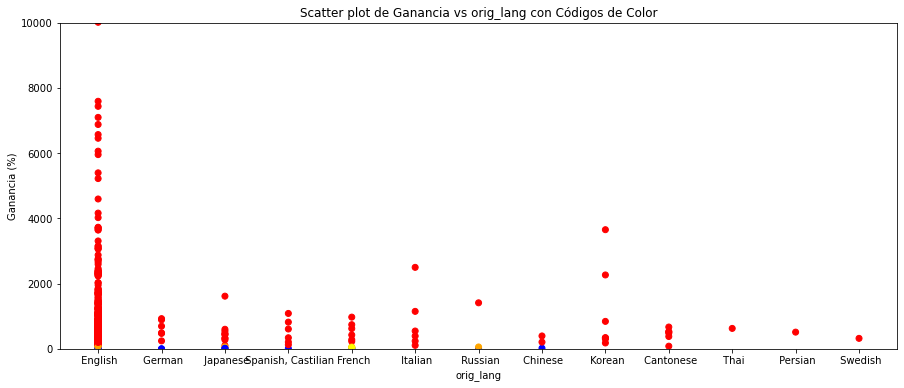

In [44]:
scatter_colour_percent_gain(df_percentgain,'orig_lang')

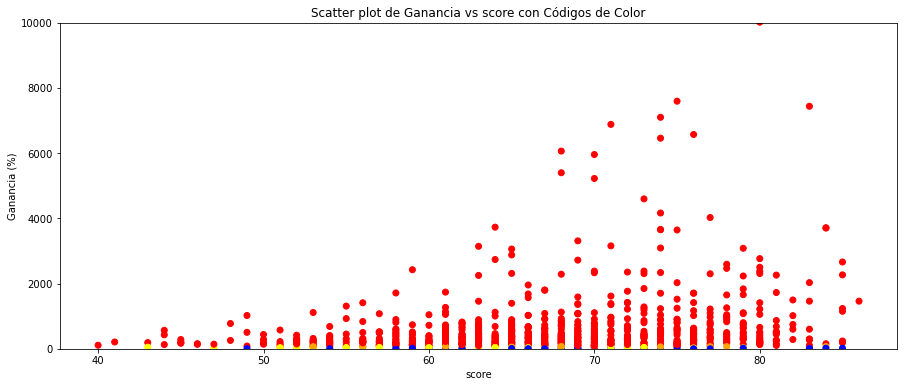

In [45]:
scatter_colour_percent_gain(df_percentgain,'score')

In [46]:
def scatter_y_vs_x(df,field_x,field_y):


    plt.figure(figsize=(15,6))
    plt.scatter(df_percentgain[field_x], df_percentgain[field_y])
# Agregar etiquetas y título
    plt.xlabel(field_x)
    plt.ylabel(field_y)
    plt.title(f'Scatter plot de {field_y} vs {field_x} con Códigos de Color')
    plt.show()


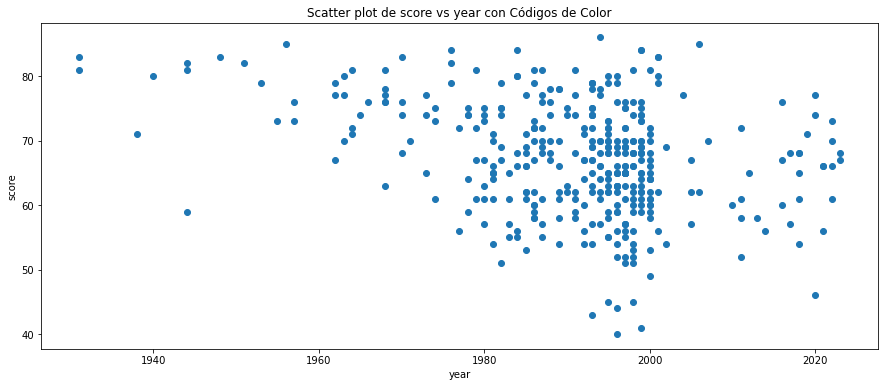

In [47]:

scatter_y_vs_x(df_percentgain,'year','score')

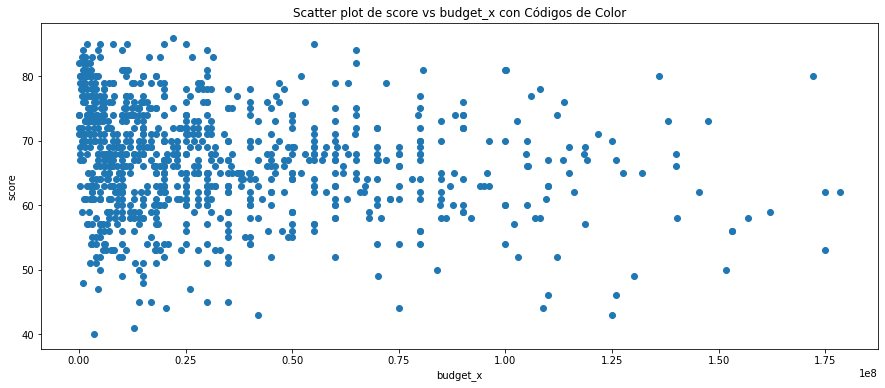

In [48]:
scatter_y_vs_x(df_percentgain,'budget_x','score')

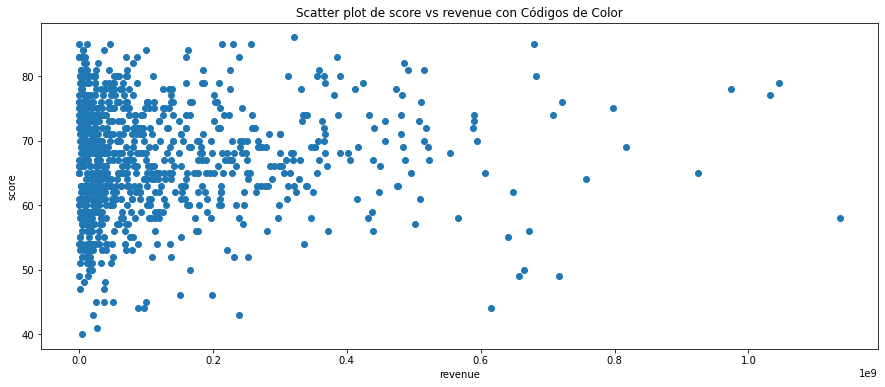

In [49]:
scatter_y_vs_x(df_percentgain,'revenue','score')

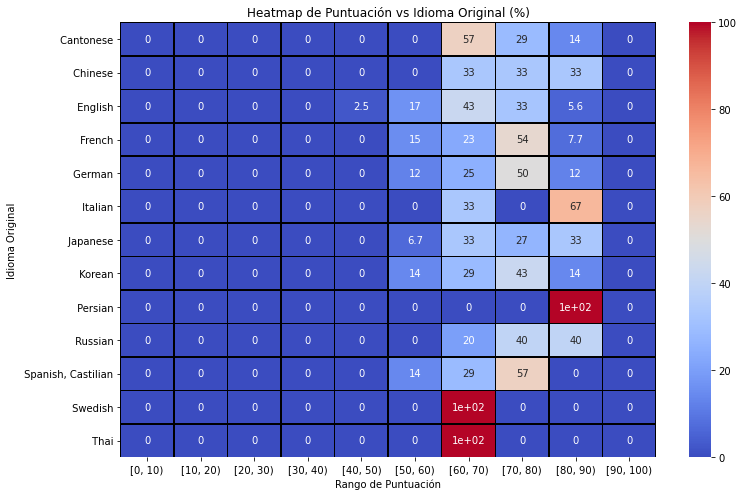

In [50]:
df_percentgain['score_range'] = pd.cut(df_percentgain['score'], bins=np.arange(0, 101, 10), right=False)

pivot_table = df_percentgain.pivot_table(index='orig_lang', columns='score_range', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_percentage, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Heatmap de Puntuación vs Idioma Original (%)')
plt.xlabel('Rango de Puntuación')
plt.ylabel('Idioma Original')
plt.show()

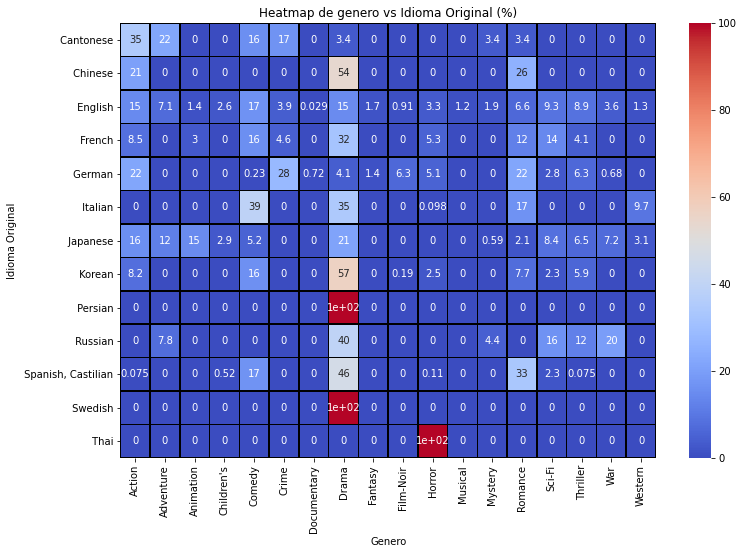

In [51]:
pivot_table = df_exploded.pivot_table(index='orig_lang', columns='genre_split', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_percentage, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Heatmap de genero vs Idioma Original (%)')
plt.xlabel('Genero')
plt.ylabel('Idioma Original')
plt.show()

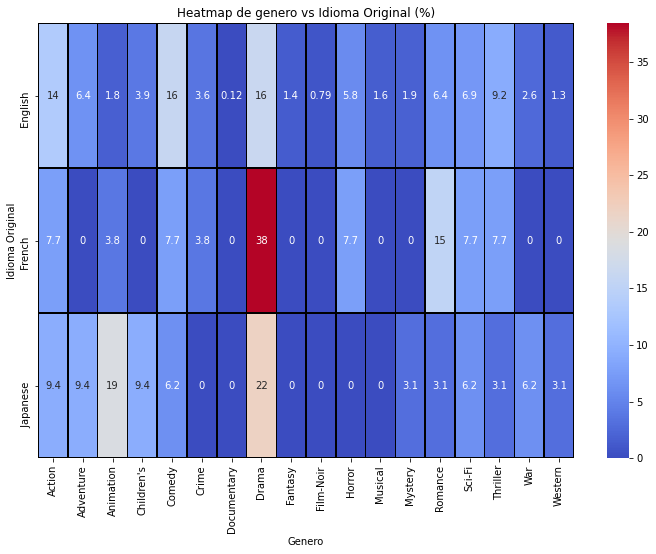

In [52]:
#eliminar los generos que comportan menos de 10 fims
lang_counts = df_percentgain['orig_lang'].value_counts()
lang_to_keep = lang_counts[lang_counts >= 10].index
df_filtered = df_percentgain[df_percentgain['orig_lang'].isin(lang_to_keep)].copy()
df_filtered['genre_split']  = df_filtered['Gender_x'].str.split('|')  # Séparation par |
df_filtered_exploded = df_filtered.explode('genre_split')

#Heatmap
pivot_table = df_filtered_exploded.pivot_table(index='orig_lang', columns='genre_split', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_percentage, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Heatmap de genero vs Idioma Original (%)')
plt.xlabel('Genero')
plt.ylabel('Idioma Original')
plt.show()

In [53]:
print(lang_counts[lang_counts >= 1])

 English               846
 Japanese               15
 French                 13
 German                  8
 Spanish, Castilian      7
 Cantonese               7
 Korean                  7
 Italian                 6
 Russian                 5
 Chinese                 3
 Persian                 1
 Swedish                 1
 Thai                    1
Name: orig_lang, dtype: int64


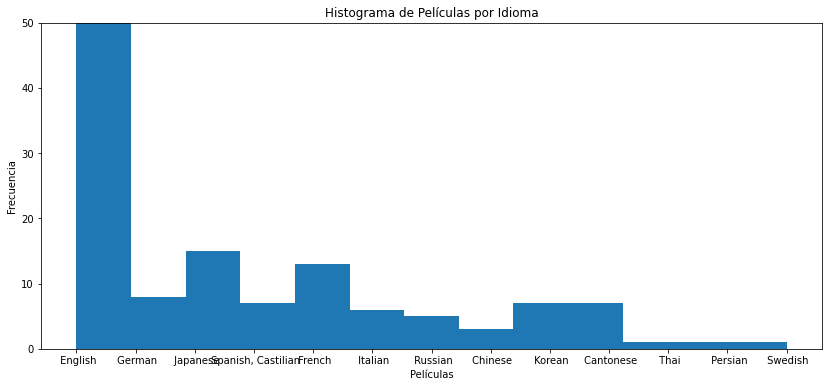

In [54]:
plt.figure(figsize=(14, 6))


plt.hist(df_percentgain['orig_lang'], bins=13)
plt.ylim(0, 50)
plt.xlabel('Películas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Películas por Idioma')
plt.show()

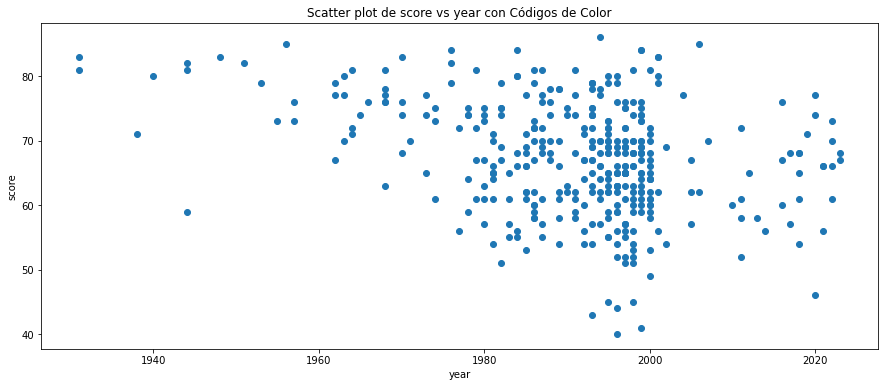

In [55]:
scatter_y_vs_x(df_percentgain,'year','score')

In [56]:
df_percentgain

,Unnamed: 0,MovieID,Rating,Timestamp,Title,Gender_x,names,date_x,score,genre_imdb,...,revenue,country,Gender_y,Zip-code,percentual_gain,year,color,genre_num,orig_lang_num,score_range
0,0,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,1976-01-04,84.0,Drama,...,163274115.0,AU,F,48067,3710.775341,1976.0,red,0,0,"[80, 90)"
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,1997-03-04,65.0,"Adventure,Â Animation,Â Family,Â Fantasy",...,28946127.0,AU,F,48067,76.174018,1997.0,red,1,0,"[60, 70)"
2,2,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,NaT,75.0,"Romance,Â Drama,Â Music",...,72072607.0,US,F,48067,423.956512,NaN,red,2,0,"[70, 80)"
3,3,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,NaT,74.0,Drama,...,257805243.0,AU,F,48067,515.610486,NaN,red,0,0,"[70, 80)"
4,4,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs,1938-02-06,71.0,"Fantasy,Â Animation,Â Family",...,184925486.0,AU,F,48067,12427.788038,1938.0,red,1,0,"[70, 80)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138874,138874,3652,2,1041753491,City of the Living Dead (Paura nella cittÃ de...,Horror,City of the Living Dead,1980-11-08,63.0,Horror,...,476680473.8,IT,M,43725,547.908591,1980.0,red,65,5,"[60, 70)"
145933,145933,2226,3,1036451763,"Ring, The (1927)",Drama,Ring,NaT,71.0,"Horror,Â Thriller",...,19400000.0,AU,F,48103,1616.666667,NaN,red,0,2,"[70, 80)"
226986,226986,2777,4,972180772,Cobra (1925),Drama,Cobra,1986-01-10,60.0,"Action,Â Crime,Â Thriller",...,49042224.0,AU,F,12345,196.168896,1986.0,red,0,0,"[60, 70)"
264147,264147,1430,1,970074286,Underworld (1997),Thriller,Underworld,NaT,68.0,"Fantasy,Â Action,Â Thriller",...,95708457.0,AU,M,48135,435.038441,NaN,red,112,0,"[60, 70)"


In [57]:
df_corr_regresion_problem=df_percentgain.drop(columns=["Rating", "Timestamp","Title","names","orig_title","date_x","score_range"])

In [58]:
df_corr_regresion_problem

,Unnamed: 0,MovieID,Gender_x,score,genre_imdb,status,orig_lang,budget_x,revenue,country,Gender_y,Zip-code,percentual_gain,year,color,genre_num,orig_lang_num
0,0,1193,Drama,84.0,Drama,Released,English,4400000.0,163274115.0,AU,F,48067,3710.775341,1976.0,red,0,0
1,1,661,Animation|Children's|Musical,65.0,"Adventure,Â Animation,Â Family,Â Fantasy",Released,English,38000000.0,28946127.0,AU,F,48067,76.174018,1997.0,red,1,0
2,2,914,Musical|Romance,75.0,"Romance,Â Drama,Â Music",Released,English,17000000.0,72072607.0,US,F,48067,423.956512,NaN,red,2,0
3,3,3408,Drama,74.0,Drama,Released,English,50000000.0,257805243.0,AU,F,48067,515.610486,NaN,red,0,0
4,4,594,Animation|Children's|Musical,71.0,"Fantasy,Â Animation,Â Family",Released,English,1488000.0,184925486.0,AU,F,48067,12427.788038,1938.0,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138874,138874,3652,Horror,63.0,Horror,Released,Italian,87000000.0,476680473.8,IT,M,43725,547.908591,1980.0,red,65,5
145933,145933,2226,Drama,71.0,"Horror,Â Thriller",Released,Japanese,1200000.0,19400000.0,AU,F,48103,1616.666667,NaN,red,0,2
226986,226986,2777,Drama,60.0,"Action,Â Crime,Â Thriller",Released,English,25000000.0,49042224.0,AU,F,12345,196.168896,1986.0,red,0,0
264147,264147,1430,Thriller,68.0,"Fantasy,Â Action,Â Thriller",Released,English,22000000.0,95708457.0,AU,M,48135,435.038441,NaN,red,112,0


In [59]:
df_genres = df_corr_regresion_problem['Gender_x'].str.get_dummies(sep='|')
df_corr_regresion_problem = pd.concat([df_corr_regresion_problem, df_genres], axis=1)
print(df_corr_regresion_problem.head())

   Unnamed: 0  MovieID                      Gender_x  score  \
0           0     1193                         Drama   84.0   
1           1      661  Animation|Children's|Musical   65.0   
2           2      914               Musical|Romance   75.0   
3           3     3408                         Drama   74.0   
4           4      594  Animation|Children's|Musical   71.0   

                                 genre_imdb     status orig_lang    budget_x  \
0                                     Drama   Released   English   4400000.0   
1  Adventure,Â Animation,Â Family,Â Fantasy   Released   English  38000000.0   
2                   Romance,Â Drama,Â Music   Released   English  17000000.0   
3                                     Drama   Released   English  50000000.0   
4              Fantasy,Â Animation,Â Family   Released   English   1488000.0   

       revenue country  ... Fantasy Film-Noir  Horror  Musical Mystery  \
0  163274115.0      AU  ...       0         0       0        0    

In [60]:
print(df_corr_regresion_problem.columns)

Index(['Unnamed: 0', 'MovieID', 'Gender_x', 'score', 'genre_imdb', 'status',
       'orig_lang', 'budget_x', 'revenue', 'country', 'Gender_y', 'Zip-code',
       'percentual_gain', 'year', 'color', 'genre_num', 'orig_lang_num',
       'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [61]:
df_corr_regresion_problem.rename(columns={'Children\'s': 'Childrens'}, inplace=True)


In [62]:
print(pd.to_numeric(df_corr_regresion_problem['Action'], errors='coerce').notna().all())
print(pd.to_numeric(df_corr_regresion_problem['Adventure'], errors='coerce').notna().all())
print(pd.to_numeric(df_corr_regresion_problem['Animation'], errors='coerce').notna().all())
print(pd.to_numeric(df_corr_regresion_problem['Childrens'], errors='coerce').notna().all())
print(pd.to_numeric(df_corr_regresion_problem['Comedy'], errors='coerce').notna().all())
print(pd.to_numeric(df_corr_regresion_problem['Crime'], errors='coerce').notna().all())

True
True
True
True
True
True


In [63]:
df_corr_regresion_problem

,Unnamed: 0,MovieID,Gender_x,score,genre_imdb,status,orig_lang,budget_x,revenue,country,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1193,Drama,84.0,Drama,Released,English,4400000.0,163274115.0,AU,...,0,0,0,0,0,0,0,0,0,0
1,1,661,Animation|Children's|Musical,65.0,"Adventure,Â Animation,Â Family,Â Fantasy",Released,English,38000000.0,28946127.0,AU,...,0,0,0,1,0,0,0,0,0,0
2,2,914,Musical|Romance,75.0,"Romance,Â Drama,Â Music",Released,English,17000000.0,72072607.0,US,...,0,0,0,1,0,1,0,0,0,0
3,3,3408,Drama,74.0,Drama,Released,English,50000000.0,257805243.0,AU,...,0,0,0,0,0,0,0,0,0,0
4,4,594,Animation|Children's|Musical,71.0,"Fantasy,Â Animation,Â Family",Released,English,1488000.0,184925486.0,AU,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138874,138874,3652,Horror,63.0,Horror,Released,Italian,87000000.0,476680473.8,IT,...,0,0,1,0,0,0,0,0,0,0
145933,145933,2226,Drama,71.0,"Horror,Â Thriller",Released,Japanese,1200000.0,19400000.0,AU,...,0,0,0,0,0,0,0,0,0,0
226986,226986,2777,Drama,60.0,"Action,Â Crime,Â Thriller",Released,English,25000000.0,49042224.0,AU,...,0,0,0,0,0,0,0,0,0,0
264147,264147,1430,Thriller,68.0,"Fantasy,Â Action,Â Thriller",Released,English,22000000.0,95708457.0,AU,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df_corr_regresion_problem=df_corr_regresion_problem.drop(columns=["Gender_x","color","genre_num","status","Zip-code","Gender_y","orig_lang"])

In [65]:
df_corr_regresion_problem=df_corr_regresion_problem.drop(columns=["Unnamed: 0"])

In [66]:
df_corr_regresion_problem

,MovieID,score,genre_imdb,budget_x,revenue,country,percentual_gain,year,orig_lang_num,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,84.0,Drama,4400000.0,163274115.0,AU,3710.775341,1976.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,661,65.0,"Adventure,Â Animation,Â Family,Â Fantasy",38000000.0,28946127.0,AU,76.174018,1997.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,914,75.0,"Romance,Â Drama,Â Music",17000000.0,72072607.0,US,423.956512,NaN,0,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,74.0,Drama,50000000.0,257805243.0,AU,515.610486,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,594,71.0,"Fantasy,Â Animation,Â Family",1488000.0,184925486.0,AU,12427.788038,1938.0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138874,3652,63.0,Horror,87000000.0,476680473.8,IT,547.908591,1980.0,5,0,...,0,0,1,0,0,0,0,0,0,0
145933,2226,71.0,"Horror,Â Thriller",1200000.0,19400000.0,AU,1616.666667,NaN,2,0,...,0,0,0,0,0,0,0,0,0,0
226986,2777,60.0,"Action,Â Crime,Â Thriller",25000000.0,49042224.0,AU,196.168896,1986.0,0,0,...,0,0,0,0,0,0,0,0,0,0
264147,1430,68.0,"Fantasy,Â Action,Â Thriller",22000000.0,95708457.0,AU,435.038441,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
country_mapping = {country: idx for idx, country in enumerate(df_corr_regresion_problem['country'].unique())}

print("Mapeo de países a números:")
for country, num in country_mapping.items():
    print(f"{country}: {num}")
df_corr_regresion_problem['country'] = df_corr_regresion_problem['country'].map(country_mapping)


Mapeo de países a números:
AU: 0
US: 1
MX: 2
FR: 3
GB: 4
CA: 5
ES: 6
JP: 7
SU: 8
HK: 9
KR: 10
DE: 11
IT: 12
IE: 13
TH: 14
SE: 15


In [68]:

min_value = df_corr_regresion_problem['percentual_gain'].min()
max_value = df_corr_regresion_problem['percentual_gain'].max()
print(f"Valor mínimo de percentual_gain: {min_value}")
print(f"Valor máximo de percentual_gain: {max_value}")

df_corr_regresion_problem['percentual_gain'] = df_corr_regresion_problem['percentual_gain'].apply(lambda x: -30 if x == 0 else 10 * np.log10(x))


Valor mínimo de percentual_gain: 0.0
Valor máximo de percentual_gain: 66803.68566666666


In [69]:
min_value = df_corr_regresion_problem['percentual_gain'].min()
max_value = df_corr_regresion_problem['percentual_gain'].max()
print(f"Valor mínimo de percentual_gain: {min_value}")
print(f"Valor máximo de percentual_gain: {max_value}")

Valor mínimo de percentual_gain: -30.711085556347623
Valor máximo de percentual_gain: 48.24800423860861


In [70]:
df_corr_regresion_problem.rename(columns={'percentual_gain': 'log_percentual_gain'}, inplace=True)

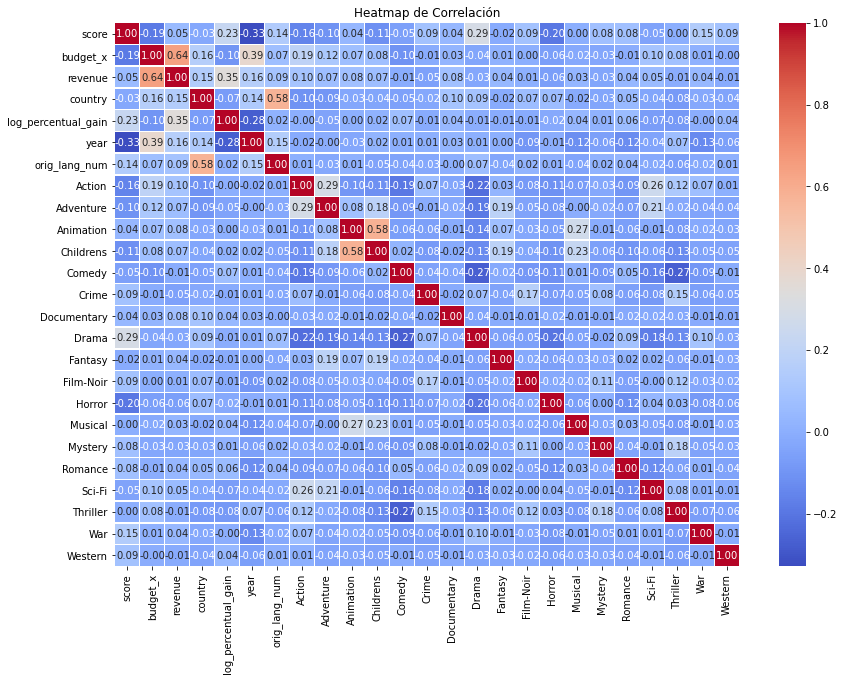

In [71]:
df_corr = df_corr_regresion_problem.drop(columns=['MovieID','genre_imdb'])

correlation_matrix = df_corr.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlación')
plt.show()

In [72]:
df_corr

,score,budget_x,revenue,country,log_percentual_gain,year,orig_lang_num,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,84.0,4400000.0,163274115.0,0,35.694647,1976.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65.0,38000000.0,28946127.0,0,18.818069,1997.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,75.0,17000000.0,72072607.0,1,26.273213,NaN,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,74.0,50000000.0,257805243.0,0,27.123217,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71.0,1488000.0,184925486.0,0,40.943938,1938.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138874,63.0,87000000.0,476680473.8,12,27.387081,1980.0,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145933,71.0,1200000.0,19400000.0,0,32.086205,NaN,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226986,60.0,25000000.0,49042224.0,0,22.926301,1986.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264147,68.0,22000000.0,95708457.0,0,26.385276,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Películas entre 1940 y 1950: 5
Películas entre 1950 y 1960: 6
Películas entre 1960 y 1970: 17
Películas entre 1970 y 1980: 25
Películas entre 1980 y 1990: 82
Películas entre 1990 y 2000: 175
Películas entre 2000 y 2010: 35
Películas entre 2010 y 2020: 22


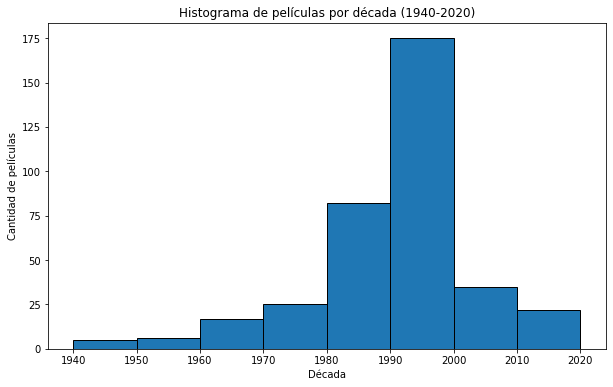

In [73]:
bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

plt.figure(figsize=(10,6))
plt.hist(df_corr_regresion_problem['year'], bins=bins, edgecolor='black')

hist, bin_edges = np.histogram(df_corr_regresion_problem['year'], bins=bins)

for i in range(len(hist)):
    print(f"Películas entre {bin_edges[i]} y {bin_edges[i+1]}: {hist[i]}")


plt.xlabel('Década')
plt.ylabel('Cantidad de películas')
plt.title('Histograma de películas por década (1940-2020)')

plt.show()

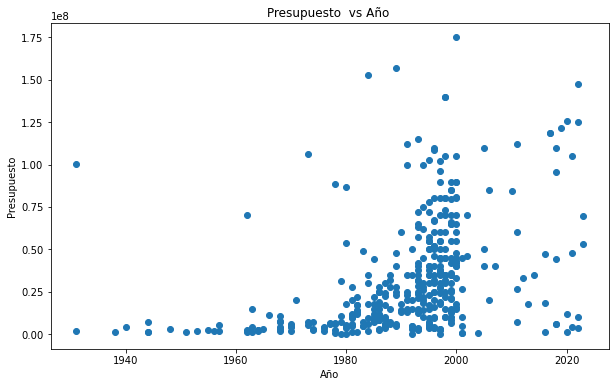

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(df_corr_regresion_problem['year'], df_corr_regresion_problem['budget_x'])
plt.xlabel('Año')
plt.ylabel('Presupuesto')
plt.title('Presupuesto  vs Año ')
plt.show()


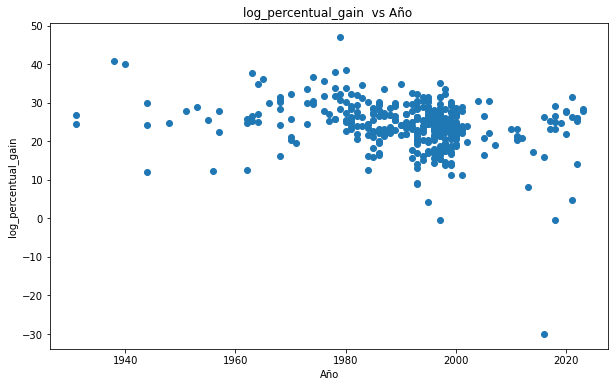

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(df_corr_regresion_problem['year'], df_corr_regresion_problem['log_percentual_gain'])
plt.xlabel('Año')
plt.ylabel('log_percentual_gain')
plt.title('log_percentual_gain  vs Año ')
plt.show()


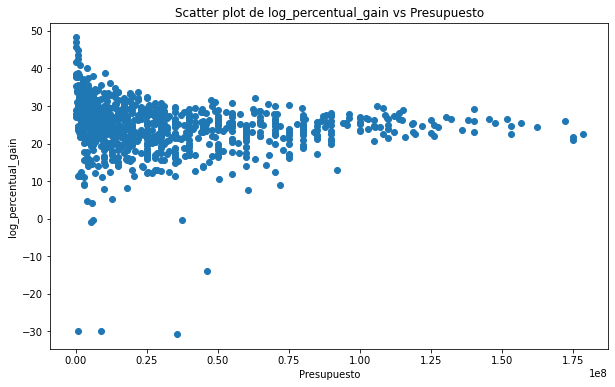

In [76]:
plt.figure(figsize=(10,6))

plt.scatter(df_corr_regresion_problem['budget_x'], df_corr_regresion_problem['log_percentual_gain'])

plt.xlabel('Presupuesto')
plt.ylabel('log_percentual_gain')
plt.title('Scatter plot de log_percentual_gain vs Presupuesto')
plt.show()

In [77]:
df_corr_regresion_problem.columns

Index(['MovieID', 'score', 'genre_imdb', 'budget_x', 'revenue', 'country',
       'log_percentual_gain', 'year', 'orig_lang_num', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

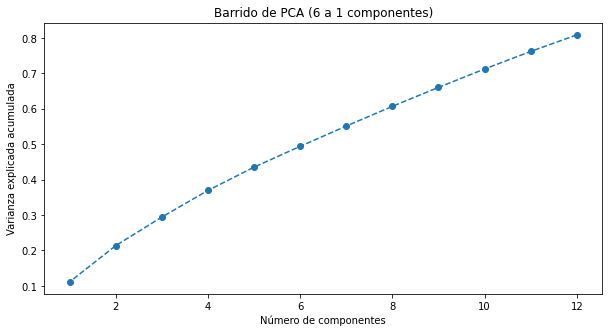

In [78]:
generos = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 
           'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
           'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

X = df_corr_regresion_problem[generos]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

varianza_explicada = []
for n in range(12, 0, -1):
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    varianza_explicada.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10,5))
plt.plot(range(12, 0, -1), varianza_explicada, marker='o', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Barrido de PCA (6 a 1 componentes)')
plt.show()

In [79]:
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)  # X_scaled es el dataset de géneros ya normalizado

pca_columns = [f'PCA_genre_{i+1}' for i in range(11)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

df_corr_regresion_problem = pd.concat([df_corr_regresion_problem, df_pca], axis=1)

df_corr_regresion_problem.drop(columns=generos, inplace=True)

print(df_corr_regresion_problem.head())

   MovieID  score                                genre_imdb    budget_x  \
0   1193.0   84.0                                     Drama   4400000.0   
1    661.0   65.0  Adventure,Â Animation,Â Family,Â Fantasy  38000000.0   
2    914.0   75.0                   Romance,Â Drama,Â Music  17000000.0   
3   3408.0   74.0                                     Drama  50000000.0   
4    594.0   71.0              Fantasy,Â Animation,Â Family   1488000.0   

       revenue  country  log_percentual_gain    year  orig_lang_num  \
0  163274115.0      0.0            35.694647  1976.0            0.0   
1   28946127.0      0.0            18.818069  1997.0            0.0   
2   72072607.0      1.0            26.273213     NaN            0.0   
3  257805243.0      0.0            27.123217     NaN            0.0   
4  184925486.0      0.0            40.943938  1938.0            0.0   

   PCA_genre_1  PCA_genre_2  PCA_genre_3  PCA_genre_4  PCA_genre_5  \
0     -0.48947    -1.029568     0.101283     0.85934

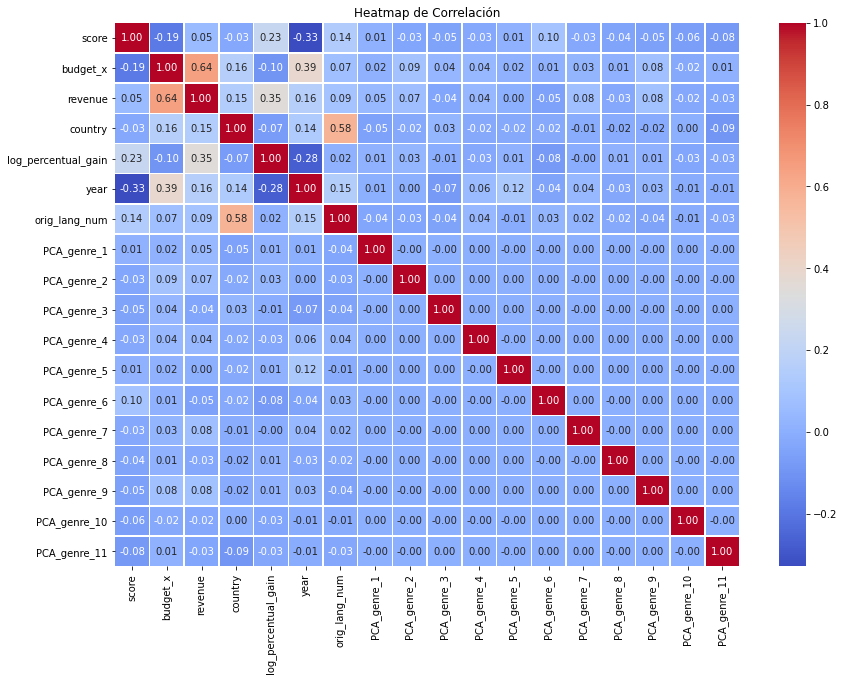

In [80]:
df_corr = df_corr_regresion_problem.drop(columns=['MovieID','genre_imdb'])

correlation_matrix = df_corr.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlación')
plt.show()

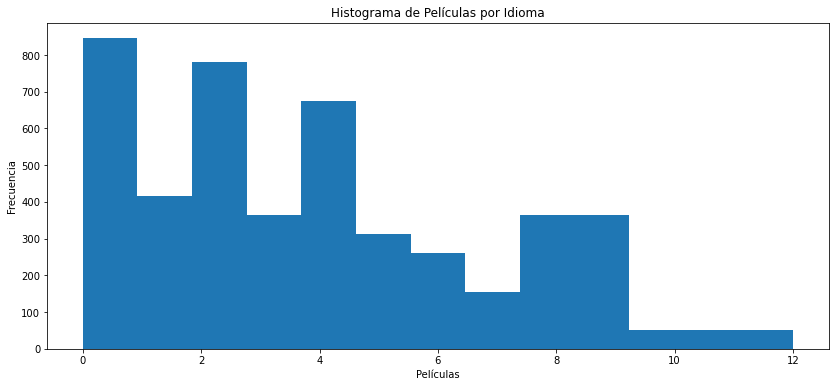

In [ ]:
non_english_df = df_corr_regresion_problem[(df_corr_regresion_problem["orig_lang_num"] != 0)]

duplicated_df=non_english_df
for i in range(50):
    duplicated_df=duplicated_df.append(non_english_df)

df_con_idiomas_copiadas = df_corr_regresion_problem.append(duplicated_df)

plt.figure(figsize=(14, 6))


plt.hist(df_con_idiomas_copiadas['orig_lang_num'], bins=13)
plt.xlabel('Películas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Películas por Idioma')
plt.show()

In [ ]:
def get_last_digit(movieid):
    return int(str(movieid)[-1])

df['last_digit'] = df['MovieID'].apply(get_last_digit)

train_data = df[df['last_digit'].isin([0, 1, 2, 3, 4, 5, 6])]
validation_data = df[df['last_digit'].isin([7, 8, 9])]

train_data = train_data.drop(columns=['last_digit'])
validation_data = validation_data.drop(columns=['last_digit'])

print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {validation_data.shape}")

train_data.to_csv('train_data.csv', index=False)
validation_data.to_csv('validation_data.csv', index=False)



Train data shape: (333726, 43)
Validation data shape: (144490, 43)
